In [1]:
import tensorflow as tf
import tensorflow.contrib as tf_contrib

def batch_norm(x, is_training=False, scope='batch_norm'):
    return tf_contrib.layers.batch_norm(x,
                                        decay=0.9, epsilon=1e-05,
                                        center=True, scale=True, renorm=True, updates_collections=None,
                                        is_training=is_training, scope=scope)

    # return tf.layers.batch_normalization(x, momentum=0.99, epsilon=1e-05, center=True, scale=True, renorm=True, training=is_training, name=scope)


def instance_norm(x, scope='instance_norm'):
    return tf_contrib.layers.instance_norm(x,
                                           epsilon=1e-05,
                                           center=True, scale=True,
                                           scope=scope)

def layer_norm(x, scope='layer_norm') :
    return tf_contrib.layers.layer_norm(x,
                                        center=True, scale=True,
                                        scope=scope)

def group_norm(x, G=32, eps=1e-5, scope='group_norm') :
    with tf.variable_scope(scope) :
        N, H, W, C = x.get_shape().as_list()
        G = min(G, C)

        x = tf.reshape(x, [N, H, W, G, C // G])
        mean, var = tf.nn.moments(x, [1, 2, 4], keep_dims=True)
        x = (x - mean) / tf.sqrt(var + eps)

        gamma = tf.get_variable('gamma', [1, 1, 1, C], initializer=tf.constant_initializer(1.0))
        beta = tf.get_variable('beta', [1, 1, 1, C], initializer=tf.constant_initializer(0.0))


        x = tf.reshape(x, [N, H, W, C]) * gamma + beta

    return x


D:\Python\anaconda3.4\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


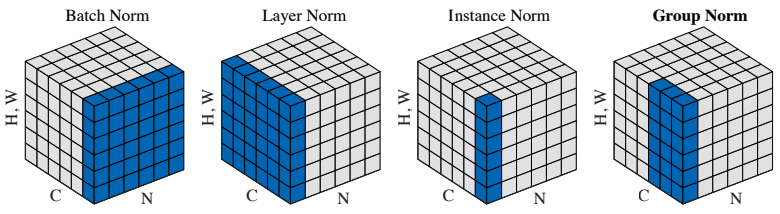

In [2]:
from IPython.display import Image
Image(filename="./norm.png")